This notebook contains material reminding you of the process of correcting data taken by a CCD. Most of this material was covered back in Lab 4.

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [2]:
path = 'example_data/'
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements    

FileNotFoundError: [Errno 2] No such file or directory: 'example_data/tBias00000001.fit'

In [3]:
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(21,24):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(24,27):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))  

FileNotFoundError: [Errno 2] No such file or directory: 'example_data/t00000011.fit'

In [4]:
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


In [5]:
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


TypeError: Invalid dimensions for image data

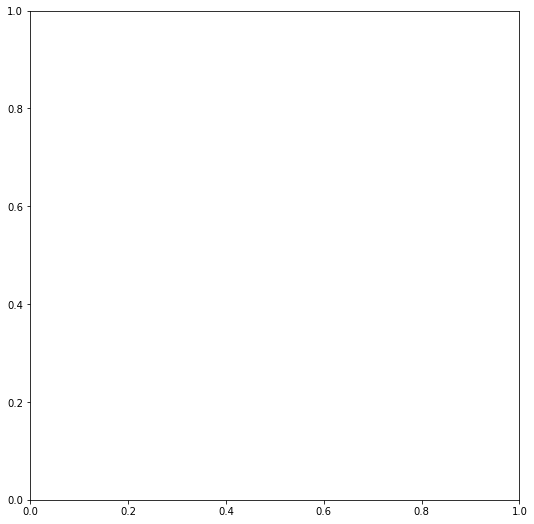

In [6]:
plt.imshow(avg_lamp)
plt.show()

TypeError: Invalid dimensions for image data

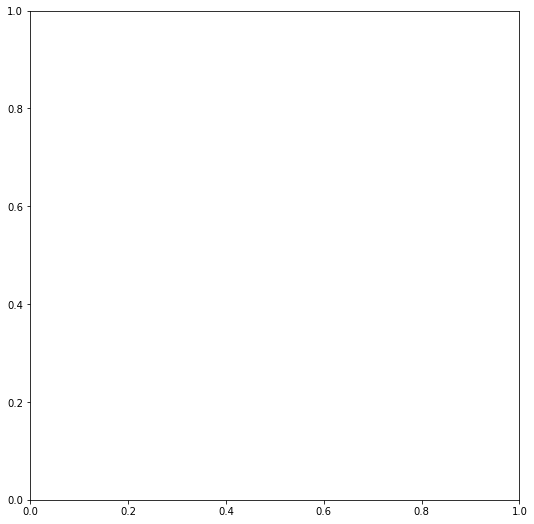

In [7]:
plt.imshow(avg_sun)
plt.show()

In [8]:
plt.imshow(avg_sun[400:500,:])

IndexError: invalid index to scalar variable.

In [9]:
plt.imshow(avg_lamp[400:500,:])

IndexError: invalid index to scalar variable.

In [10]:
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0) #Averages the value along each column in the region that our spectra look relatively free of contamination
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

example_lines = [100, 300] #These are for example purposes, not actual wavelengths for the lamp

plt.plot(np.flip(np.arange(len(lamp_good)),0), lamp_good, 'k-') #np.flip(~~~) reverses the array inside it.
for line in example_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()

# The x-axis wavelength values are clearly incorrect. They need to be stretched and shifted so that the lines
# from the discharge tube match with their actual values. This correction can then also be applied to our solar spectra

IndexError: invalid index to scalar variable.